# Data Mining Versuch Verkehrsschilderkennung mit Neuronalen Netzen

* Autor: Prof. Dr. Johannes Maucher
* Datum: 01.06.2021

# Einführung

In diesem Versuch soll ein Convolutional Neural Network (CNN) für die Erkennung von Verkehrschildern implementiert, trainiert, evaluiert und getestet werden. Als Eingabe erhält das neuronale Netz Bilder von deutschen Verkehrsschildern. Ausgabe ist der Typ des Verkehrsschilds. Für Training und Test sind die Verkehrsschildbilder schon in separate Verzeichnissen abgelegt. Neben den Bildern selbst, enthält das zu diesem Versuch gehörende Datenverzeichnis auch Dateien mit Metadaten, die z.B. Bildeigenschaften, Verkehrsschildbedeutungen und die zugehörigen Klassenlabel beschreiben. Die Daten können Sie von hier herunterladen: https://cloud.mi.hdm-stuttgart.de/s/eQbA7wQttqqKLHW

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Convolutional Neural Networks (CNNs)
* Implementierung Tiefer Neuronaler Netze mit Tensorflow und Keras: 
    - Definition der Netzarchitektur
    - Training
    - Evaluation und Test
    
* Einfache Methoden der Bildverarbeitung:
    - Augmentierung
    - Kontrastverstärkung

* Evaluation eines Klassifikators


## Vorbereitung

### Grundlagen Neuronale Netze
Machen Sie sich mit den [Grundlagen herkömmlicher Neuronaler Netze (KI Vorlesung)](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/09_PartLernen4.pdf) und den [Grundlagen Convolutional Neural Networks ((KI Vorlesung))](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/V11DeepLearningKIversion.pdf) vertraut.


### Implementierung Neuronaler Netze mit Tensorflow und Keras
Machen Sie sich mit der Implementierung von Neuronalen Netzen mit Tensorflow und Keras vertraut. Z.B. mit den [Tensorflow Quickstart Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)

# Durchführung

## Vorbereitende Untersuchungen
1. Importieren Sie ein Bild aus dem Verzeichnis `Train` mit der [scikit-image.io](https://scikit-image.org/docs/dev/api/skimage.io.html)-Methode `imread()` und zeigen Sie dieses mit der Methode `imshow()` an. Geben Sie die Größe des Bildes aus (Attribut `.shape`). 
2. Verändern Sie die Größe des Bildes mit der [scikit-image.transform](https://scikit-image.org/docs/dev/api/skimage.transform.html)-Methode `resize()` auf eine Größe von $32x32x3$. Die Verzerrung des Seitenverhältnisses kann dabei ignoriert werden. Diese Methode führt auch eine Normalisierung der Pixelwerte von [0,255] auf [0,1] durch.
3. Führen Sie mit der [scikit-image.exposure](https://scikit-image.org/docs/dev/api/skimage.exposure.html)-Methode `equalize_adapthist()` eine Kontrastverstärkung des Bildes durch. Zeigen Sie das vergrößerte und kontrastangereicherte Bild an. **Anmerkung:** Das kontrastverstärkte Bild sieht zwar unschöner aus, auf der Basis kontrastverstärkter Bilder läßt sich aber im allgemeinen die Objekterkennung verbessern.
2. Importieren Sie die Datei `Train.csv` und machen Sie sich mit deren Inhalt vertraut. Die Datei `Test.csv` ist gleich strukturiert, bezieht sich aber auf die Bilder im Verzeichnis `Test`. Wieviele Zeilen enthalten die Dateien?
3. Importieren Sie die Datei `signnames.csv` und machen Sie sich mit deren Inhalt vertraut. 

(30, 29, 3)

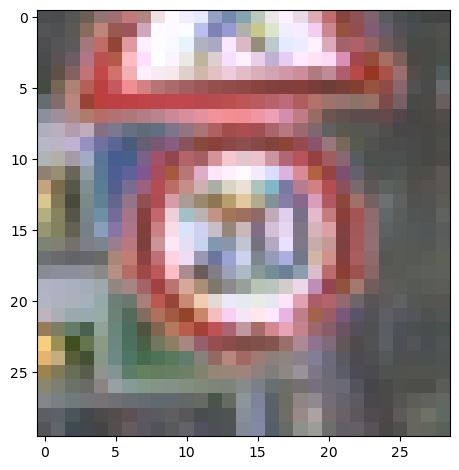

In [54]:
from skimage.io import imread, imshow

img = imread('/home/jovyan/work/uebung-6/data/Train/0/00000_00000_00000.png')
imshow(img)
display(img.shape)

In [55]:
from skimage.transform import resize

img = resize(img, (32, 32))

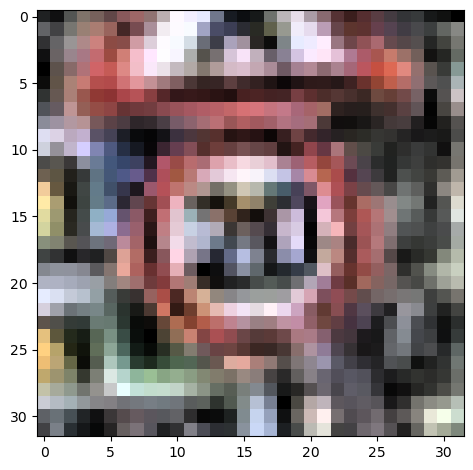

In [56]:
from skimage.exposure import equalize_adapthist

img = equalize_adapthist(img)

imshow(img)

In [57]:
import pandas as pd

train_csv = pd.read_csv('/home/jovyan/work/uebung-6/data/Train.csv')

display(train_csv.head())

display(train_csv.size)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


313672

In [58]:
signnames_csv = pd.read_csv('/home/jovyan/work/uebung-6/data/signnames.csv')

display(signnames_csv.head())

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


## Funktion für den Import aller Trainings- bzw. Testbilder
Schreiben Sie eine Funktion mit folgenden Eigenschaften:
* Der Funktion wird der Name der Datei übergeben, in welcher die Metadaten stehen, also entweder `Train.csv` oder `Test.csv`.
* Rückgabewerte der Funktion sind 
    * ein 4-dimensionales numpy-array, das alle Bilder des jeweiligen Verzeichnisses (Training oder Test) enthält.
    * ein 1-dimensionales numpy-array, das die Klassenlabel aller Bilder enthält.
* Die Bilder müssen alle auf eine Größe von $32x32x3$ skaliert werden (wie in der Vorbereitungsaufgabe).
* Für alle Bilder ist eine Kontrastverstärkung durchzuführen (wie in der Vorbereitungsaufgabe).

**Tipps für die Implementierung dieser Funktion:**

Iterieren Sie mit einer for-Schleife über alle Zeilen des metadaten-Files. Pro Iteration kann dann 
* der vollständige Verzeichnis- und Filenamen ausgelesen werden,
* das entsprechende Bild mit `imread()` eingelesen werden,
* das Bild auf die vorgegebene Größe angepasst werden,
* der Kontrast des Bildes verstärkt werden.

**Wichtig:** In den von der Funktion zurückgegebenen Arrays, dürfen die Bilder nicht wie in der ursprünglichen Reihenfolge im Dateiverzeichnis enthalten sein. Um sicherzustellen, dass beim Training jedes Minibatch möglichst viele verschiedene Klassen enthält, muss die Reihenfolge geshuffelt werden. Am einfachsten ist es, wenn gleich die Zeilen des Metadatenfiles geshuffelt werden.

In [59]:
import numpy as np

def import_training_data(path: str):
    X = []
    y = []
    csv = pd.read_csv('/home/jovyan/work/uebung-6/data/' + path)
    shuffled_metadata = csv.sample(frac=1, random_state=42).reset_index(drop=True)
    for i, row in shuffled_metadata.iterrows():
        img = imread('/home/jovyan/work/uebung-6/data/' + row['Path'])
        img = resize(img, (32, 32))
        img = equalize_adapthist(img)
        X.append(img)
        y.append(row['ClassId'])
    return np.array(X), np.array(y)

## Laden und Vorverarbeiten der Trainings- und Testdaten
1. Laden Sie mit der in der vorigen Teilaufgabe implementierten Funktion alle Trainingsbilder (`trainX`), Trainingslabel (`trainY`), Testbilder (`testX`) und Testlabel (`testY`)
1. Bestimmen Sie die Häufigkeitsverteilung der Klassen in den Trainings- und Testdaten. Visualisieren Sie diese.
3. Alle Labels, sowohl der Trainings- als auch der Testdaten müssen One-Hot-encodiert werden.

In [60]:
trainX, train_y_raw = import_training_data("Train.csv")

In [61]:
testX, test_y_raw = import_training_data("Test.csv")

In [62]:
import matplotlib.pyplot as plt

def visualize_distribution(y: np.ndarray, title: str):
  counts, bins = np.histogram(y)
  plt.stairs(counts, bins)
  plt.xlabel('ClassId')
  plt.ylabel('Count')
  plt.title(title)
  plt.show()

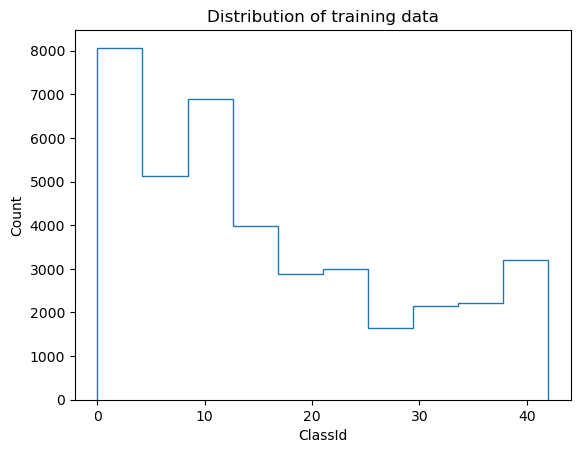

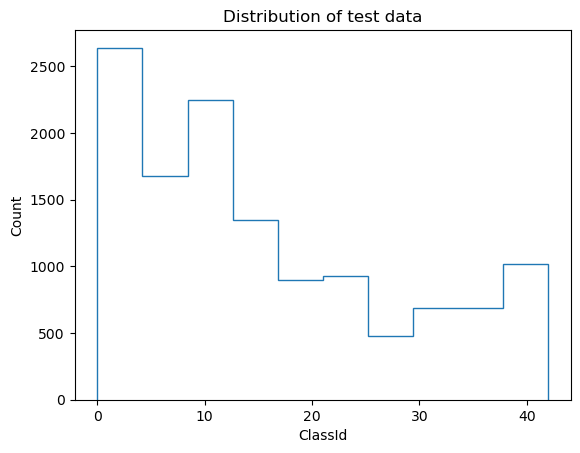

In [63]:
visualize_distribution(train_y_raw, 'Distribution of training data')
visualize_distribution(test_y_raw, 'Distribution of test data')

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

trainY = encoder.fit_transform(train_y_raw.reshape(-1, 1))
testY = encoder.transform(test_y_raw.reshape(-1, 1))

## Definition der CNN Architektur
Schreiben Sie eine Funktion `generateCNN(width, height, depth, classes)` die eine Keras CNN-Architektur zurück gibt. Für die Definition der Architektur werden dieser Funktion die Parameter:

* `width`: Breite der Bilder
* `height`: Höhe der Bilder
* `depth`: Anzahl der Kanäle pro Bild
* `classes`: Anzahl der unterschiedlichen Klassen

übergeben. Die in der Funktion zu implementierende Architektur ist im folgenden Bild dargestellt. In der Spalte *Output shape* bezeichnen die zweite und dritte Zahl die Breite und die Höhe der einzelnen Kanäle (*Bilder*), der letzte Parameter bezeichnet die Anzahl der Kanäle (Parameter *filters* in der Konfiguration).
In der Übersichtstabelle ist die Filtergröße nicht aufgeführt. Empfohlen sind folgende Größen:
* für alle Pooling Layer: *pool_size=(2,2)*.
* für den ersten Conv2D-Layer: *kernel_size=(5,5)*.
* für alle weiteren Conv2D-Layer: *kernel_size=(3,3)*

**Anmerkung:** Der in der Tabelle mit *flatten_5* bezeichnete Layer ist nicht notwendig und erzeugt in bestimmten Keras-Versionen eine Fehlermeldung. Der Layer sollte nicht in die Architektur mit aufgenommen werden.


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnTrafficSign.png" style="width:700px" align="middle">

In [65]:
import tensorflow as tf


def generate_cnn(width: int, height: int, depth: int, classes: int):
  model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Conv2D(8, (5, 5), input_shape=(width, height, depth), activation='relu', padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(classes),
    tf.keras.layers.Activation('softmax'),
  ])
  return model

## Training des CNN
Rufen Sie die im vorigen Abschnitt implementierte Funktion `generateCNN()` auf und weisen Sie die von der Funktion zurückgegebene Architektur der Variablen `model` zu. Durch Aufruf der Funktion `model.summary()` erhalten Sie eine Übersicht des erzeugten Netzes.

Für das Training soll der `Adam`-Algorithmus aus dem Modul `tensorflow.keras.optimizers` benutzt werden. `Adam` implementiert ein *Stochastic Gradient Descent*-Lernverfahren, welches die Lernraten für die Gewichte individuell und dynamisch anpasst.

In den folgenden zwei Codezellen, werden die Trainingsparameter konfiguriert:

In [66]:
from tensorflow.keras.optimizers.legacy import Adam

model = generate_cnn(32, 32, 3, 43)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 8)         608       
                                                                 
 activation_8 (Activation)   (None, 32, 32, 8)         0         
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 activation_9 (Activation)   (None, 16, 16, 16)       

In [67]:
NUM_EPOCHS = 15 # Number of training epochs 
INIT_LR = 1e-3 # Initial Learning Rate for ADAM training
BS = 64 # Size of minibatches

In [68]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5)) 
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Für das Training sollen nicht nur die vorhandenen Trainingsbilder eingesetzt werden, sondern zusätzlich Bilder die Augmentierungen der Trainingsbilder sind. Augmentierte Bilder können mit dem `ImageDataGenerator` des Moduls `tensorflow.keras.preprocessing.image` erzeugt werden. Der Code für die Erzeugung des in diesem Projekt eingesetzten Objekts ist unten gegeben. 

**Aufgabe:** Erklären Sie was in dieser Codezelle definiert wird.

Hier wird ein Generator definiert, der die Trainingsbilder leicht verändert um die Menge der Trainingsdaten zu vergrößern.

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Das Training wird mit folgender Codezelle ausgeführt.

**Aufgabe:** Erklären Sie die Argumente der Funktion `fit_generator()`. 

Für die Ausführung der Zelle muss das Dictionary `classWeight` angelegt sein. Dieses enthält für jede Klasse den Klassenindex als key und den relativen Anteil dieser Klasse in den Trainingsbildern als Value. Wenn z.B. 30% aller Trainingsdaten zur Klasse 0 gehören, dann wäre der Value zum Key 0 der Wert 0.3.

* positionales Argument: Generator, der die Trainingsdaten liefert.
* validation_data: Die Testdaten, die während des Trainings zur Validierung verwendet werden sollen.
* steps_per_epoch: Anzahl der Trainingsbilder, die pro Trainings-Epoch verwendet werden sollen.
* epochs: Anzahl der Trainings-Epochen.
* class_weight: Verteilung der Klassen in den Trainingsdaten.
* verbose: Gibt an, ob während des Trainings Fortschrittsmeldungen ausgegeben werden sollen.

In [70]:
indices, counts = np.unique(train_y_raw, return_counts=True)
total = np.sum(counts)
classWeight = {i: count / total for i, count in zip(indices, counts)}

In [71]:
# compile the model and train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // BS,
    epochs=NUM_EPOCHS,
    class_weight=classWeight,
    verbose=1)

[INFO] training network...
Epoch 1/15


/tmp/ipykernel_149/880565928.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


612/612 [==============================] - 45s 71ms/step - loss: 0.0790 - accuracy: 0.3124 - val_loss: 1.7460 - val_accuracy: 0.4832
Epoch 2/15
612/612 [==============================] - 44s 72ms/step - loss: 0.0391 - accuracy: 0.5371 - val_loss: 1.2700 - val_accuracy: 0.6112
Epoch 3/15
612/612 [==============================] - 45s 74ms/step - loss: 0.0254 - accuracy: 0.6563 - val_loss: 0.8450 - val_accuracy: 0.7227
Epoch 4/15
612/612 [==============================] - 45s 73ms/step - loss: 0.0179 - accuracy: 0.7318 - val_loss: 0.5767 - val_accuracy: 0.8024
Epoch 5/15
612/612 [==============================] - 45s 73ms/step - loss: 0.0144 - accuracy: 0.7745 - val_loss: 0.5504 - val_accuracy: 0.8183
Epoch 6/15
612/612 [==============================] - 44s 71ms/step - loss: 0.0115 - accuracy: 0.8102 - val_loss: 0.4822 - val_accuracy: 0.8420
Epoch 7/15
612/612 [==============================] - 44s 71ms/step - loss: 0.0100 - accuracy: 0.8316 - val_loss: 0.3461 - val_accuracy: 0.8826
Epo

Visualisieren Sie die Entwicklung der *Accuracy* über dem Fortschritt der Trainingsepochen. Plotten Sie dabei die entsprechenden Kurven der Accuracy auf den Trainings- und auf den Testdaten in einen Graphen.

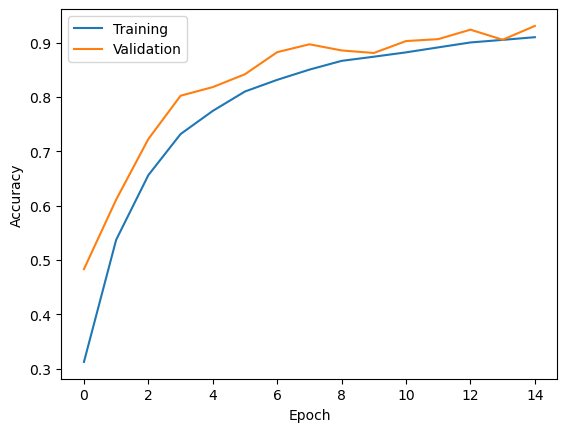

In [72]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Evaluation des gelernten Modells

Wenden Sie das gelernte CNN an, um für alle Bilder des Testdatensatzes die Art des Verkehrsschildes zu bestimmen. Evaluieren Sie die Qualität des CNN indem Sie einen `classification_report()` aus dem Modul `sklearn.metrics` erzeugen. 

1. Welche Metriken werden im Report angezeigt? Beschreiben Sie diese kurz?
2. Diskutieren Sie die Klassifikationsgenauigkeit des CNN anhand des Reports.

Zeigen Sie 5 Bilder an, die nicht korrekt klassifiziert wurden. Läßt sich die Fehlklassifikation erklären?

Im Report werden folgende Metriken angezeigt:
- Precision: Die Rate der Bilder, die das CNN als eine bestimmte Klasse klassifiziert hat, die tatsächlich zu dieser Klasse gehören. $Precision = \frac{TP}{TP+FP}$
- Recall: Die Rate der Bilder, die zu einer Klasse gehören, die das CNN als diese Klasse klassifiziert hat. $Recall = \frac{TP}{TP+FN}$
- F1-Score: Der F1-Score ist ein Mittelwert aus Precision und Recall. $F1-Score = \frac{2*Precision*Recall}{Precision+Recall}$

In [73]:
from sklearn.metrics import classification_report

predictions = model.predict(testX, batch_size=BS)
report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=signnames_csv['SignName'].values, labels=signnames_csv['ClassId'].values)
print(report)

198/198 [==============================] - 3s 13ms/step
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.27      0.42        60
                              Speed limit (30km/h)       0.96      0.97      0.97       720
                              Speed limit (50km/h)       0.96      0.99      0.97       750
                              Speed limit (60km/h)       0.98      0.92      0.95       450
                              Speed limit (70km/h)       0.95      0.97      0.96       660
                              Speed limit (80km/h)       0.91      0.96      0.94       630
                       End of speed limit (80km/h)       0.86      0.88      0.87       150
                             Speed limit (100km/h)       0.92      0.99      0.95       450
                             Speed limit (120km/h)       0.93      0.94      0.93       450
                       

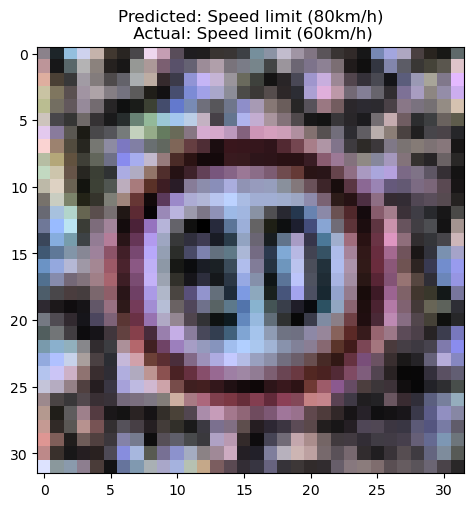

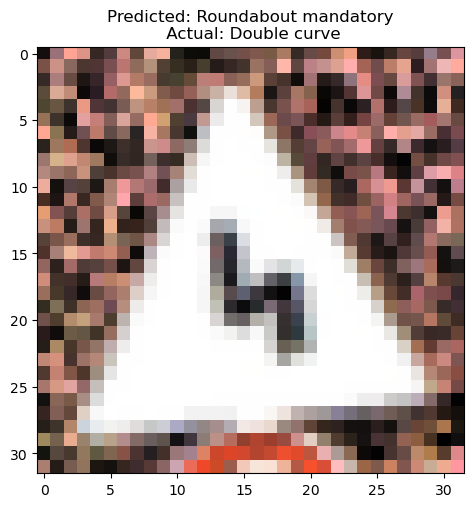

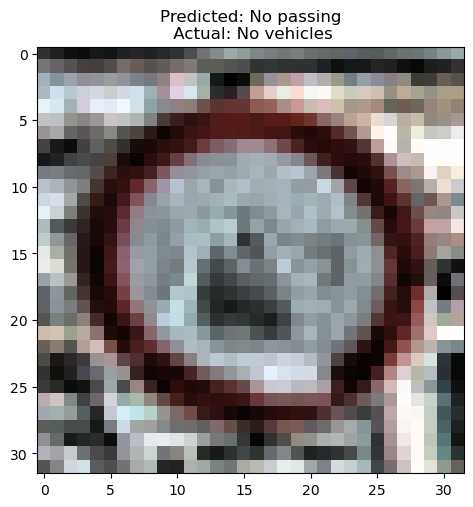

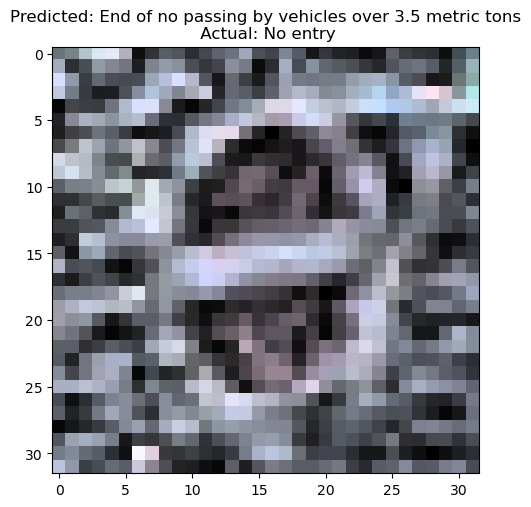

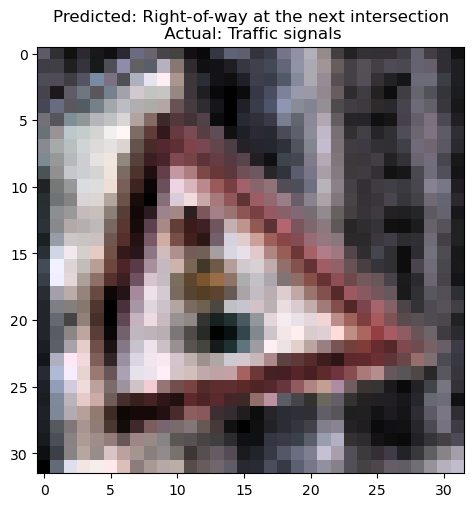

In [74]:
wrong_predictions = np.where(predictions.argmax(axis=1) != testY.argmax(axis=1))[0]
random_wrongs = np.random.choice(wrong_predictions, size=5)

for i in random_wrongs:
  predicted_label = signnames_csv.loc[predictions[i].argmax(), "SignName"]
  actual_label = signnames_csv.loc[testY[i].argmax(), "SignName"]
  imshow(testX[i])
  plt.title(f'Predicted: {predicted_label}\n Actual: {actual_label}')
  plt.show()

Die Fehlklassifikation kann durch die geringe Auflösung der Bilder erklärt werden.